<a href="https://colab.research.google.com/github/S1AG0N/BITCOIN-PRICE-PREDICTION-USING-ARIMA/blob/main/BITCOIN_PRICE_PREDITION_USING_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.8 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf

In [4]:
df=yf.download('BTC-USD')


[*********************100%***********************]  1 of 1 completed


In [5]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


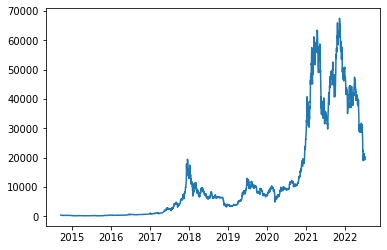

In [6]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [11]:
# TRain test split
to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])



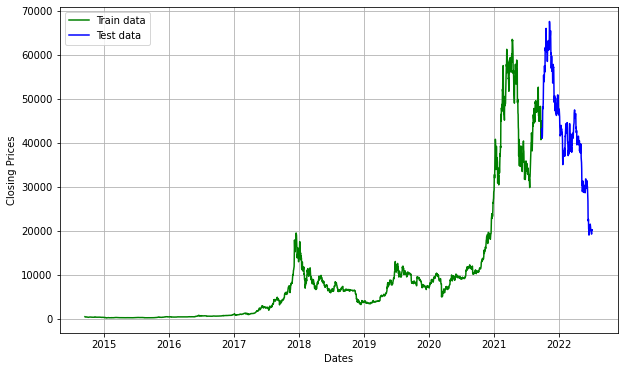

In [8]:
# split the chat into training and testing data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green', label='Train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()

In [13]:
# ARIMA MODEL
model_predictions = []
n_test_obser = len(testing_data)


In [15]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)
  

In [17]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2847
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -23090.483
Method:                       css-mle   S.D. of innovations            805.547
Date:                Wed, 06 Jul 2022   AIC                          46192.966
Time:                        00:57:21   BIC                          46228.690
Sample:                             1   HQIC                         46205.850
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9455     15.653      0.444      0.657     -23.734      37.625
ar.L1.D.y     -0.0281      0.019     -1.503      0.133      -0.065       0.009
ar.L2.D.y      0.0050      0.019      0.268      0.789      -0.032       0.042
ar.L3.D.y      0.0208      0.019      1.108      0.268      -0.016       0.057
ar.L4.D.y      0.0379      0.019      2.027      0.043       0.001       0.075
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1612           -0.0000j            2.1612           -0.0000
AR.2           -0.1737           -2.2660j            2.2726           -0.2622
AR.3           -0.1737           +2.2660j            2.2726            0.2622
AR.4           -2.3607           -0.0000j            2.3607           -0.5000
-----------------------------------------------------------------------------
"""

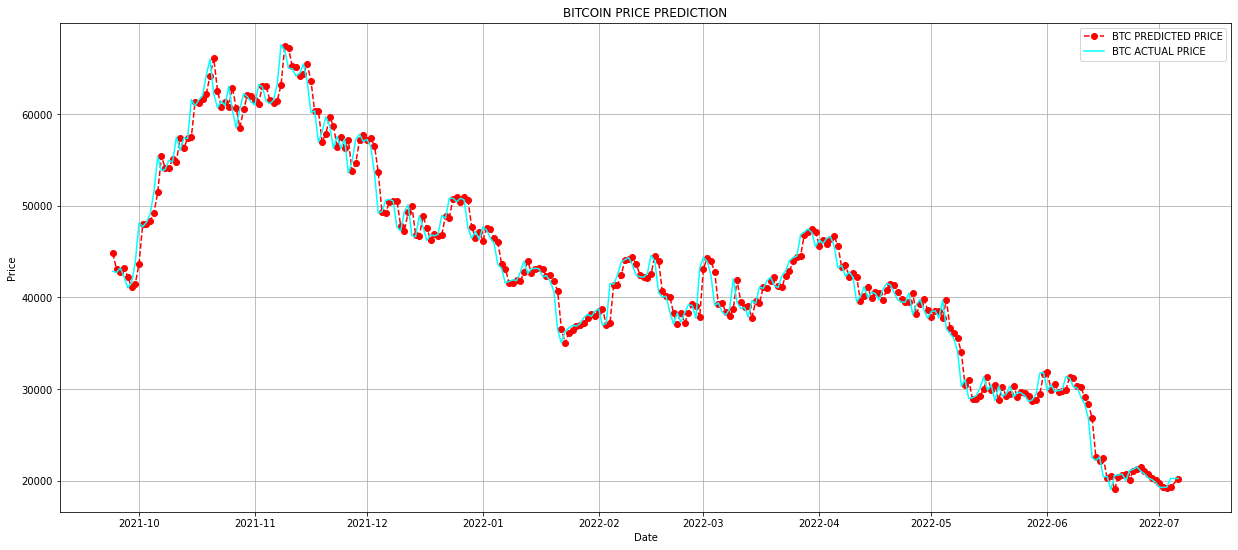

In [22]:
plt.figure(figsize=(21,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'red', marker = 'o', linestyle= 'dashed', label = 'BTC PREDICTED PRICE')
plt.plot(date_range, testing_data, color = 'aqua', label = 'BTC ACTUAL PRICE')

plt.title('BITCOIN PRICE PREDICTION')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()